In [458]:
import numpy as np
import pandas as pd
import datetime
import plotly.express as px
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print("---Python script Start---", str(datetime.datetime.now()))

---Python script Start--- 2023-08-05 13:39:49.348381


In [459]:
df = pd.read_csv(
    "C:\\Users\\terre\OneDrive - University of Cape Town\\Terrence\\Code\\prescient-coding-challenge-2023\\data\\returns_train.csv"
)
display(df)

,month_end,Stock1,Stock10,Stock11,Stock14,Stock16,Stock18,Stock19,Stock20,Stock21,...,Stock78,Stock79,Stock80,Stock81,Stock84,Stock85,Stock86,Stock87,Stock88,Stock9
0,2010-01-31,0.042603,-0.076059,-0.149741,-0.031251,-0.053032,-0.113752,-0.071671,0.005430,0.005715,...,-0.028168,0.017445,-0.100000,0.018014,0.044749,0.016824,-0.111084,-0.035229,-0.033204,0.030927
1,2010-02-28,-0.015034,-0.100305,-0.023279,0.002484,0.077088,0.010849,0.022383,0.095480,0.067745,...,0.082448,-0.106195,0.066669,0.000556,-0.010800,0.006326,-0.026405,-0.013759,0.095241,-0.010000
2,2010-03-31,0.111545,0.097933,0.121501,0.064357,0.107439,0.017883,0.000892,0.032425,0.018012,...,0.036357,0.220049,0.098957,0.088889,0.088630,0.047296,0.153527,0.034416,0.041795,0.024809
3,2010-04-30,-0.040491,-0.034262,-0.032848,-0.030232,0.022388,0.085504,-0.007159,0.052763,0.017920,...,0.040579,0.004259,-0.052133,0.005099,-0.016164,0.012845,-0.004702,0.019786,0.042046,0.030303
4,2010-05-31,-0.069359,-0.073188,0.004349,0.010792,-0.025548,-0.001887,-0.012534,0.068973,-0.026794,...,-0.025069,-0.062221,0.004332,-0.023857,-0.085645,-0.041085,-0.083320,0.095238,-0.124253,-0.010784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2017-04-30,0.057631,0.089651,-0.090908,-0.045544,0.033207,-0.003331,0.036885,-0.017510,0.097012,...,0.039548,0.009388,0.096569,0.086140,0.097051,0.036655,-0.059447,-0.005197,-0.111087,0.044074
88,2017-05-31,-0.013557,-0.027089,-0.050713,-0.052443,-0.132316,-0.013774,-0.071147,-0.045192,-0.031881,...,-0.042451,-0.032799,0.069729,-0.018660,-0.054422,0.071153,-0.083055,0.092917,-0.039052,-0.031945
89,2017-06-30,-0.022060,-0.098539,-0.016556,0.005218,-0.008810,-0.125433,-0.028937,0.069444,-0.055806,...,-0.001562,-0.055437,-0.062808,-0.019475,0.034172,-0.077723,-0.002616,0.020783,0.038300,0.011196
90,2017-07-31,0.036795,0.002527,0.059680,0.074563,0.135041,0.056864,0.038476,0.109808,0.023922,...,0.096860,0.089980,0.142830,0.001359,0.005916,0.064159,0.234903,0.084005,0.112443,0.027391


In [460]:
df = pd.read_csv(
    "C:\\Users\\terre\OneDrive - University of Cape Town\\Terrence\\Code\\prescient-coding-challenge-2023\\data\\returns_test.csv"
)
display(df)

,month_end,Stock1,Stock10,Stock11,Stock14,Stock16,Stock18,Stock19,Stock20,Stock21,...,Stock78,Stock79,Stock80,Stock81,Stock84,Stock85,Stock86,Stock87,Stock88,Stock9
0,2017-09-30,0.083899,0.053319,0.049182,-0.099562,-0.114310,-0.055291,-0.037531,-0.006674,-0.057661,...,-0.066003,-0.031052,-0.004497,-0.055256,-0.031516,0.023068,0.031268,-0.112615,-0.011307,0.022963
1,2017-10-31,0.060536,0.028676,0.029625,0.029335,-0.001841,-0.106763,-0.012945,-0.026603,0.044929,...,0.048952,0.070757,0.179795,0.042174,0.008201,-0.006720,0.093561,-0.046792,0.215918,-0.018551
2,2017-11-30,-0.102193,0.027349,-0.128125,0.073356,0.166052,-0.041408,0.052944,0.186932,0.106927,...,0.123914,0.156616,0.070452,0.014745,0.125875,0.115800,-0.046361,-0.030274,-0.026521,0.018901
3,2017-12-31,-0.045036,-0.080070,-0.131899,0.098228,0.248923,-0.029056,0.056703,0.192133,0.111679,...,0.129262,0.034759,-0.064190,0.102804,0.153443,0.139685,0.011155,0.004274,0.111534,0.075942
4,2018-01-31,0.026665,-0.025548,-0.009082,-0.018691,-0.001265,0.071279,-0.038067,0.167967,0.013795,...,-0.092203,0.075166,-0.019854,0.001060,-0.010387,0.146272,0.133166,0.122322,-0.046485,-0.049569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-05-31,-0.083869,-0.024526,-0.009009,-0.044468,0.019794,-0.016504,0.000652,-0.035289,0.024911,...,-0.044724,-0.139194,0.066355,0.057087,0.068901,0.000458,0.068366,-0.032767,-0.004966,-0.004018
57,2022-06-30,-0.004672,-0.053094,0.022726,0.057442,-0.138842,-0.213426,-0.217772,-0.120665,-0.216392,...,-0.119287,-0.074327,0.381054,-0.137041,-0.158318,-0.039239,-0.238200,-0.078775,-0.179747,-0.137902
58,2022-07-31,0.145072,0.021164,-0.064891,-0.019389,0.022547,0.192015,0.053393,0.015562,0.031020,...,0.001483,0.020277,-0.004769,0.051881,0.099740,0.019991,0.032506,0.051858,0.093850,0.125350
59,2022-08-31,-0.023993,-0.166561,-0.145650,0.121916,0.045429,0.003722,-0.106694,0.033809,-0.021830,...,-0.042483,-0.047557,0.029426,-0.067982,0.047055,0.005474,-0.046378,-0.085405,-0.006774,-0.136339


In [461]:
# data reads
df_returns_train = pd.read_csv("data/returns_train.csv")
df_returns_test = pd.read_csv("data/returns_test.csv")
df_returns_train["month_end"] = pd.to_datetime(arg=df_returns_train["month_end"]).apply(
    lambda d: d.date()
)
df_returns_test["month_end"] = pd.to_datetime(arg=df_returns_test["month_end"]).apply(
    lambda d: d.date()
)

In [462]:
# Ignoring the month_end from training set

# Get column names as a list but ignore the first column
header_list = df.columns[1:].tolist()
print(header_list)


def process_dataframe(dataframe):
    # Create a new dataframe without the 'month_end' column
    new_dataframe = dataframe.drop(["month_end"], axis=1)
    return new_dataframe


clean_df = process_dataframe(df_returns_train)
clean_df

['Stock1', 'Stock10', 'Stock11', 'Stock14', 'Stock16', 'Stock18', 'Stock19', 'Stock20', 'Stock21', 'Stock22', 'Stock26', 'Stock3', 'Stock30', 'Stock31', 'Stock33', 'Stock34', 'Stock35', 'Stock38', 'Stock39', 'Stock4', 'Stock40', 'Stock41', 'Stock43', 'Stock44', 'Stock46', 'Stock47', 'Stock49', 'Stock5', 'Stock50', 'Stock54', 'Stock56', 'Stock59', 'Stock6', 'Stock61', 'Stock63', 'Stock64', 'Stock66', 'Stock69', 'Stock7', 'Stock70', 'Stock73', 'Stock75', 'Stock76', 'Stock77', 'Stock78', 'Stock79', 'Stock80', 'Stock81', 'Stock84', 'Stock85', 'Stock86', 'Stock87', 'Stock88', 'Stock9']


,Stock1,Stock10,Stock11,Stock14,Stock16,Stock18,Stock19,Stock20,Stock21,Stock22,...,Stock78,Stock79,Stock80,Stock81,Stock84,Stock85,Stock86,Stock87,Stock88,Stock9
0,0.042603,-0.076059,-0.149741,-0.031251,-0.053032,-0.113752,-0.071671,0.005430,0.005715,0.001399,...,-0.028168,0.017445,-0.100000,0.018014,0.044749,0.016824,-0.111084,-0.035229,-0.033204,0.030927
1,-0.015034,-0.100305,-0.023279,0.002484,0.077088,0.010849,0.022383,0.095480,0.067745,0.082493,...,0.082448,-0.106195,0.066669,0.000556,-0.010800,0.006326,-0.026405,-0.013759,0.095241,-0.010000
2,0.111545,0.097933,0.121501,0.064357,0.107439,0.017883,0.000892,0.032425,0.018012,0.031663,...,0.036357,0.220049,0.098957,0.088889,0.088630,0.047296,0.153527,0.034416,0.041795,0.024809
3,-0.040491,-0.034262,-0.032848,-0.030232,0.022388,0.085504,-0.007159,0.052763,0.017920,0.007674,...,0.040579,0.004259,-0.052133,0.005099,-0.016164,0.012845,-0.004702,0.019786,0.042046,0.030303
4,-0.069359,-0.073188,0.004349,0.010792,-0.025548,-0.001887,-0.012534,0.068973,-0.026794,-0.056697,...,-0.025069,-0.062221,0.004332,-0.023857,-0.085645,-0.041085,-0.083320,0.095238,-0.124253,-0.010784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.057631,0.089651,-0.090908,-0.045544,0.033207,-0.003331,0.036885,-0.017510,0.097012,-0.000908,...,0.039548,0.009388,0.096569,0.086140,0.097051,0.036655,-0.059447,-0.005197,-0.111087,0.044074
88,-0.013557,-0.027089,-0.050713,-0.052443,-0.132316,-0.013774,-0.071147,-0.045192,-0.031881,-0.000167,...,-0.042451,-0.032799,0.069729,-0.018660,-0.054422,0.071153,-0.083055,0.092917,-0.039052,-0.031945
89,-0.022060,-0.098539,-0.016556,0.005218,-0.008810,-0.125433,-0.028937,0.069444,-0.055806,-0.002845,...,-0.001562,-0.055437,-0.062808,-0.019475,0.034172,-0.077723,-0.002616,0.020783,0.038300,0.011196
90,0.036795,0.002527,0.059680,0.074563,0.135041,0.056864,0.038476,0.109808,0.023922,0.023766,...,0.096860,0.089980,0.142830,0.001359,0.005916,0.064159,0.234903,0.084005,0.112443,0.027391


In [463]:
def equalise_weights(df: pd.DataFrame):
    """
    Function to generate the equal weights, i.e. 1/p for each active stock within a month

    Args:
        df: A return data frame. First column is month end and remaining columns are stocks

    Returns:
        A dataframe of the same dimension but with values 1/p on active funds within a month

    """

    # create df to house weights
    n_length = len(df)
    df_returns = df
    df_weights = df_returns[:n_length].copy()
    df_weights.set_index("month_end", inplace=True)

    # list of stock names
    list_stocks = list(df_returns.columns)
    list_stocks.remove("month_end")

    # assign 1/p
    df_weights[list_stocks] = 1 / len(list_stocks)

    return df_weights

In [464]:
# Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(clean_df.values)

# Create a data structure with 60 time-steps and 1 output for each stock
lookback = 60

X, y = [], []
for i in range(lookback, len(scaled_data)):
    X.append(scaled_data[i - lookback : i])
    y.append(scaled_data[i])
X, y = np.array(X), np.array(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LSTM model
model = Sequential()

model.add(
    LSTM(
        units=50,
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2]),
    )
)
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(
    Dense(units=clean_df.shape[1])
)  # number of units in the output layer should be equal to the number of stocks

# Compile and train the model
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_val, y_val))

Epoch 1/50
2/2 [==============================] - 10s 2s/step - loss: 0.2312 - val_loss: 0.2173
Epoch 2/50
2/2 [==============================] - 0s 108ms/step - loss: 0.1978 - val_loss: 0.1785
Epoch 3/50
2/2 [==============================] - 0s 120ms/step - loss: 0.1697 - val_loss: 0.1472
Epoch 4/50
2/2 [==============================] - 0s 128ms/step - loss: 0.1430 - val_loss: 0.1206
Epoch 5/50
2/2 [==============================] - 0s 101ms/step - loss: 0.1329 - val_loss: 0.1012
Epoch 6/50
2/2 [==============================] - 0s 100ms/step - loss: 0.1153 - val_loss: 0.0879
Epoch 7/50
2/2 [==============================] - 0s 117ms/step - loss: 0.1047 - val_loss: 0.0779
Epoch 8/50
2/2 [==============================] - 0s 100ms/step - loss: 0.1038 - val_loss: 0.0689
Epoch 9/50
2/2 [==============================] - 0s 100ms/step - loss: 0.0922 - val_loss: 0.0630
Epoch 10/50
2/2 [==============================] - 0s 103ms/step - loss: 0.0866 - val_loss: 0.0594
Epoch 11/50
2/2 [====

In [465]:
history = model.fit(
    X_train, y_train, epochs=50, batch_size=10, validation_data=(X_val, y_val)
)

Epoch 1/50
3/3 [==============================] - 0s 98ms/step - loss: 0.0573 - val_loss: 0.0453
Epoch 2/50
3/3 [==============================] - 0s 87ms/step - loss: 0.0584 - val_loss: 0.0451
Epoch 3/50
3/3 [==============================] - 0s 85ms/step - loss: 0.0551 - val_loss: 0.0457
Epoch 4/50
3/3 [==============================] - 0s 96ms/step - loss: 0.0580 - val_loss: 0.0461
Epoch 5/50
3/3 [==============================] - 0s 81ms/step - loss: 0.0595 - val_loss: 0.0464
Epoch 6/50
3/3 [==============================] - 0s 78ms/step - loss: 0.0531 - val_loss: 0.0462
Epoch 7/50
3/3 [==============================] - 0s 87ms/step - loss: 0.0553 - val_loss: 0.0462
Epoch 8/50
3/3 [==============================] - 0s 83ms/step - loss: 0.0563 - val_loss: 0.0451
Epoch 9/50
3/3 [==============================] - 0s 91ms/step - loss: 0.0547 - val_loss: 0.0453
Epoch 10/50
3/3 [==============================] - 0s 78ms/step - loss: 0.0550 - val_loss: 0.0455
Epoch 11/50
3/3 [============

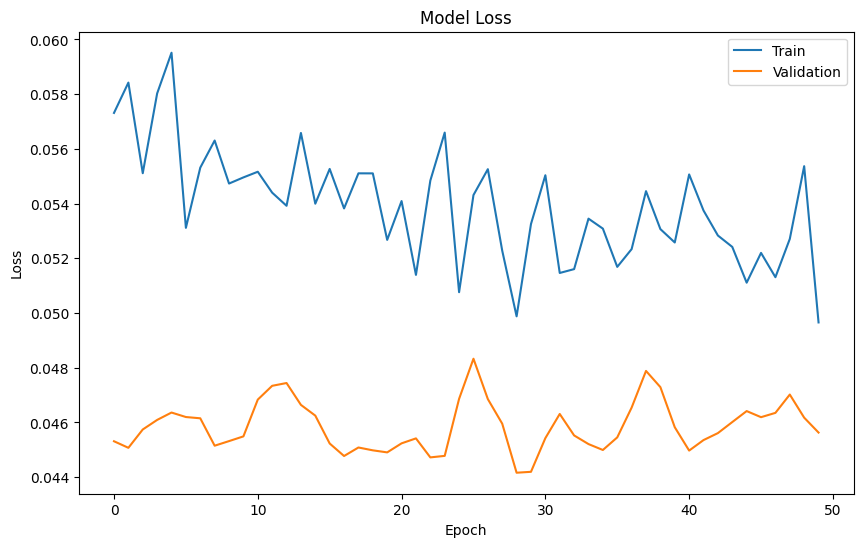

In [466]:
# summarize history for loss
plt.figure(figsize=(10, 6))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

In [467]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae", "mape"])

In [468]:
def generate_portfolio(df_train: pd.DataFrame, df_test: pd.DataFrame):
    """
    Function to generate stocks weight allocation for time t+1 using historic data. Initial weights generated as 1/p for active stock within a month

    Args:
        df_train: The training set of returns. First column is month end and remaining columns are stocks
        df_test: The testing set of returns. First column is month end and remaining columns are stocks

    Returns:
        The returns dataframe and the weights
    """

    print(
        "---> training set spans",
        df_train["month_end"].min(),
        df_train["month_end"].max(),
    )
    print(
        "---> training set spans",
        df_test["month_end"].min(),
        df_test["month_end"].max(),
    )

    # initialise data
    n_train = len(df_train)
    df_returns = pd.concat(objs=[df_train, df_test], ignore_index=True)

    df_weights = equalise_weights(
        df_returns[:n_train]
    )  # df to store weights and create initial

    # list of stock names
    list_stocks = list(df_returns.columns)
    list_stocks.remove("month_end")

    # Only positive predicted stock are considered
    # Higher volitility have higher weighting
    # Higher prediction through my machine learning algorithm (LSTM) will have higher weighting
    for i in range(len(df_test)):
        df_latest = df_returns[(df_returns["month_end"] < df_test.loc[i, "month_end"])]

        if len(df_latest) >= lookback:
            latest_returns = df_latest[-lookback:][list_stocks].values
        else:
            continue

        # reshape the latest returns to be suitable for the LSTM model
        latest_returns = np.reshape(latest_returns, (1, lookback, len(list_stocks)))

        # predict the future returns using the LSTM model
        predicted_returns = model.predict(latest_returns)

        # Filter out the stocks with positive predicted returns
        positive_returns_indices = np.where(predicted_returns[0] > 0)[0]
        positive_returns = predicted_returns[0][positive_returns_indices]
        positive_stock_names = np.array(list_stocks)[positive_returns_indices]

        # Apply exponential weighting to the positive returns
        exp_returns = np.exp(positive_returns)

        # Calculate the recent volatility for each stock
        volatilities = np.std(latest_returns[0], axis=0)

        # Scale the weights of each stock correspondto its recent volatility
        volatility_scaled_weights = exp_returns * volatilities[positive_returns_indices]

        # Normalize the weights to sum to 1
        weights = volatility_scaled_weights / np.sum(volatility_scaled_weights)

        # Create a new weight dataframe
        weights_dict = dict(zip(positive_stock_names, weights))
        weights_dict["month_end"] = df_test.loc[i, "month_end"]
        df_this = pd.DataFrame(data=[weights_dict], columns=df_weights.columns)
        df_this = df_this.fillna(0)  # fill NaNs for stocks that have been excluded

        # Append the weights to the df_weights dataframe
        df_weights = pd.concat(objs=[df_weights, df_this], ignore_index=True)

    # 10% limit check
    if len(
        np.array(df_weights[list_stocks])[np.array(df_weights[list_stocks]) > 0.101]
    ):
        raise Exception(r"---> 10% limit exceeded")

    return df_returns, df_weights

In [469]:
def plot_total_return(
    df_returns: pd.DataFrame,
    df_weights_index: pd.DataFrame,
    df_weights_portfolio: pd.DataFrame,
):
    """
    Function to generate the two total return indices.

    Args:
        df_returns: Ascending date ordered combined training and test returns data.
        df_weights_index: Index weights. Equally weighted
        df_weights_index: Portfolio weights. Your portfolio should use equally weighted for the training date range. If blank will be ignored

    Returns:
        A plot of the two total return indices and the total return indices as a dataframe
    """

    # list of stock names
    list_stocks = list(df_returns.columns)
    list_stocks.remove("month_end")

    # replace nans with 0 in return array
    ar_returns = np.array(df_returns[list_stocks])
    np.nan_to_num(x=ar_returns, copy=False, nan=0)

    # calc index
    ar_rtn_index = np.array(df_weights_index[list_stocks]) * ar_returns
    ar_rtn_port = np.array(df_weights_portfolio[list_stocks]) * ar_returns

    v_rtn_index = np.sum(ar_rtn_index, axis=1)
    v_rtn_port = np.sum(ar_rtn_port, axis=1)

    # add return series to dataframe
    df_rtn = pd.DataFrame(data=df_returns["month_end"], columns=["month_end"])
    df_rtn["index"] = v_rtn_index
    df_rtn["portfolio"] = v_rtn_port
    df_rtn

    # create total return
    base_price = 100
    df_rtn.sort_values(by="month_end", inplace=True)
    df_rtn["index_tr"] = ((1 + df_rtn["index"]).cumprod()) * base_price
    df_rtn["portfolio_tr"] = ((1 + df_rtn["portfolio"]).cumprod()) * base_price
    df_rtn

    df_rtn_long = df_rtn[["month_end", "index_tr", "portfolio_tr"]].melt(
        id_vars="month_end", var_name="series", value_name="Total Return"
    )

    # plot
    fig1 = px.line(
        data_frame=df_rtn_long, x="month_end", y="Total Return", color="series"
    )

    return fig1, df_rtn

In [470]:
# running solution
df_returns = pd.concat(objs=[df_returns_train, df_returns_test], ignore_index=True)
df_weights_index = equalise_weights(df_returns)
df_returns, df_weights_portfolio = generate_portfolio(df_returns_train, df_returns_test)
fig1, df_rtn = plot_total_return(
    df_returns,
    df_weights_index=df_weights_index,
    df_weights_portfolio=df_weights_portfolio,
)
fig1

---> training set spans 2010-01-31 2017-08-31
---> training set spans 2017-09-30 2022-09-30
1/1 [==============================] - 0s 60ms/step
